# Analyzing the Supply of Public Housing in Singapore

Public housing, or what's more intimately known as HDB flats, in Singapore are meant to be priced affordably for the masses to promote homeownership. However, recent __[hoo-ha](https://stackedhomes.com/editorial/record-breaking-1-4-million-hdb-costs-too-much-the-alternatives-may-not-be-any-better/#gs.omfpg5)__ over cross-million HDB flats may indicate otherwise (or simply a lack of better alternatives). 

Yet this is not the only debate circulating the hot topic of public housing in Singapore. Recently, there has been much buzz over __[the possibility of allowing younger singles to buy and own a HDB](https://mothership.sg/2022/03/single-singaporean-hdb-28-pritam-singh/)__. In response, the Government reiterated their commitment to monitor changes in the public's housing preferences and aspirations over time, and across different life stages of families and individuals. 

In the latest __[HDB Sample Household Survey](https://www.straitstimes.com/singapore/singapore-resident-population-in-hdb-flats-falls-to-304m-with-smaller-households-spread)__, it was found that the number of Singapore residents living in Housing Board flats has dipped for the first time since 2003, with household sizes shrinking even as the number of HDB households continued to climb. With limited land and resources, how can the Government better prioritise and allocate within these constraints?

In this notebook, we will explore a sample of data from the __[Housing Development Board](data.gov.sg/dataset/age-of-hdb-population-by-ethnic-group-and-flat-type-in-age-groups)__ and the __[Ministry of Trade and Industry](data.gov.sg/dataset/resident-population-by-ethnicity-gender-and-age-group)__.

We will try to answer the following questions about the supply and demand of public housing in Singapore: 
1. How big is the HDB resident population in Singapore (across the different flat types and age groups)?
2. How big is the Singapore resident population? 
3. Is there a trend between the HDB resident and the Singapore resident population across the years? 

<div class="alert alert-block alert-info">
<b>Note: </b> Due to dataset constraints, only data from the years (2008, 2013 and 2018) were trended. Only Singapore Residents (Singapore Citizens and Permanent Residents) were included in the dataset as they are the beneficiaries of public housing in Singapore. 
</div>

Let's start by importing all relevant packages and datasets first.

In [29]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

In [30]:
path = 'C:/Users/stayh/Documents/Jupyter files/HDB project files'

hdb_resident = pd.read_csv(path + '/age-of-hdb-resident-population-by-flat-type.csv')
hdb_resident=pd.DataFrame(hdb_resident)
hdb_resident.head()

,shs_year,flat_type,age_group,percentage
0,2008,1-room,Below 15,4.8
1,2008,1-room,15-64,56.6
2,2008,1-room,65 & above,38.6
3,2008,2-room,Below 15,12.1
4,2008,2-room,15-64,65.0


It will be more useful to obtain the HDB resident population in numerical figures, rather than percentage values. So I merged the datasets containing the total HDB resident population and the percentage of HDB residents across the different <mark> flat types </mark> and <mark>age groups</mark>. 

In [31]:
hdb_popln = pd.read_csv(path + '/hdb-resident-population-aged-15-years-and-above-by-flat-type.csv')
hdb_popln=pd.DataFrame(hdb_popln)
hdb_popln.head() 

,shs_year,flat_type,number
0,2008,1-room,33000
1,2008,2-room,57000
2,2008,3-room,498000
3,2008,4-room,988000
4,2008,5-room,615000


In [32]:
hdb_popln_total = hdb_popln.groupby ('shs_year').sum().reset_index()
hdb_popln_total

C:\Users\stayh\AppData\Local\Temp\ipykernel_560\2427853321.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hdb_popln_total = hdb_popln.groupby ('shs_year').sum().reset_index()


,shs_year,number
0,2008,2402000
1,2013,2543000
2,2018,2602000


In [33]:
hdb_resident_popln = pd.merge (hdb_resident,hdb_popln, how = 'left', on = ['shs_year','flat_type'])
hdb_resident_popln.head()

,shs_year,flat_type,age_group,percentage,number
0,2008,1-room,Below 15,4.8,33000.0
1,2008,1-room,15-64,56.6,33000.0
2,2008,1-room,65 & above,38.6,33000.0
3,2008,2-room,Below 15,12.1,57000.0
4,2008,2-room,15-64,65.0,57000.0


In [34]:
hdb_resident_popln['value'] = hdb_resident_popln.percentage/100 * hdb_resident_popln.number
hdb_resident_popln = hdb_resident_popln.drop(['percentage', 'number'], axis=1)
hdb_resident_popln=hdb_resident_popln.rename(columns = {'shs_year':'year'})
hdb_resident_popln.head()

,year,flat_type,age_group,value
0,2008,1-room,Below 15,1584.0
1,2008,1-room,15-64,18678.0
2,2008,1-room,65 & above,12738.0
3,2008,2-room,Below 15,6897.0
4,2008,2-room,15-64,37050.0


In [37]:
sg_resident = pd.read_csv(path + '/singapore-residents-by-ethnic-group-and-sex-end-june-annual.csv')
sg_resident=pd.DataFrame(sg_resident)
sg_resident.head() 

,year,level_1,level_2,value
0,1957,Total Residents,0 - 4 Years,264727
1,1957,Total Residents,5 - 9 Years,218097
2,1957,Total Residents,10 - 14 Years,136280
3,1957,Total Residents,15 - 19 Years,135679
4,1957,Total Residents,20 - 24 Years,119266


In [38]:
sg_resident = sg_resident[sg_resident['level_1']=='Total Residents']
sg_resident=sg_resident[(sg_resident['year']==2008)|(sg_resident['year']==2013)|(sg_resident['year']==2018)]
sg_resident['value'] = sg_resident['value'].astype(int) 
sg_resident = sg_resident.reset_index(drop=True)

sg_resident.head()

,year,level_1,level_2,value
0,2008,Total Residents,0 - 4 Years,193889
1,2008,Total Residents,5 - 9 Years,223622
2,2008,Total Residents,10 - 14 Years,253796
3,2008,Total Residents,15 - 19 Years,262856
4,2008,Total Residents,20 - 24 Years,225385


In [39]:
sg_resident_total = sg_resident.groupby ('year').sum().reset_index()
sg_resident_total

C:\Users\stayh\AppData\Local\Temp\ipykernel_560\3068941216.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sg_resident_total = sg_resident.groupby ('year').sum().reset_index()


,year,value
0,2008,4365064
1,2013,4778993
2,2018,5234754


After cleaning the data up, we can then perform basic exploratory data analysis to examine the trend in HDB resident population across the different <mark>types of flats</mark>, <mark>age groups</mark> and <mark>years</mark>.

In [28]:
proportion = hdb_popln_total['number']/sg_resident_total['value']*100
proportion

0    55.027830
1    53.212047
2    49.706252
dtype: float64

C:\Users\stayh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\stayh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
C:\Users\stayh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\stayh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
C:\Users\s

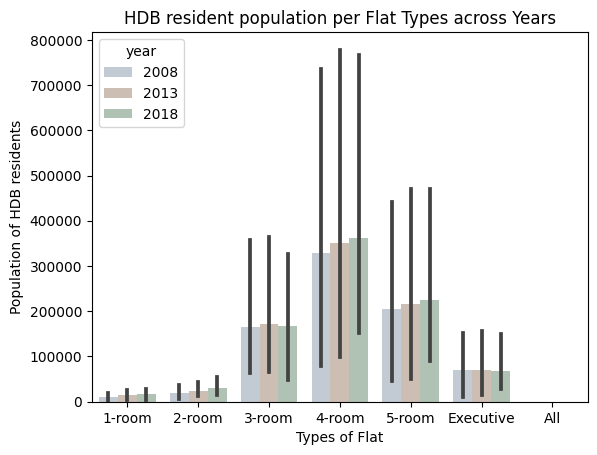

In [53]:
ax = sns.barplot(data = hdb_resident_popln, x='flat_type', y = 'value', hue = 'year',palette='pastel',saturation =0.2)
ax.set(xlabel='Types of Flat', ylabel='Population of HDB residents', title='HDB resident population per Flat Types across Years')
plt.show(ax)

Here, we noticed a few trends: 
- The number of Singapore residents living in Housing Board flats has dipped across the years, with under 50% of the SG resident population staying in HDBs today. 
- Most HDB residents choose to stay in mid-sized (4- and 5-room) flats. 
- Population of HDB residents across smaller (1- and 2-room) flats has increased steadily across the years. Notably, the population for the 3-, 4- and executive room flats have decreased. 

This may mean that space is a factor for consideration in deciding the types of HDB flats to live in, with a 4-room and 5-room flat boasting an average floor area of 90 sqm and 110 sqm respectively (as compared to an average floor area of 65 sqm for 3-room flat). However, the data is inconclusive, given that the Housing Development Board tends to release more 4- and 5-room flat types to encourage bigger family nuclei and discourage too much population fragmentation. 

Yet with the associated decrease in HDB resident population, especially for mid-sized to bigger flat types, it could indicate more residents upgrading to private property that were launched between 2013 and 2018. It could also point to the fact that fewer extended families living together in the same flat.

The increase in population of HDB residents across smaller flats could be due to a relaxation in the Housing Development Board's rules, which allowed eligible singles to buy two-room Build-To-Order flats in non-mature estates from 2013, as well as Singapore's ageing population. However, it may also indicate a trend towards smaller household sizes and single households, for personal space and privacy.

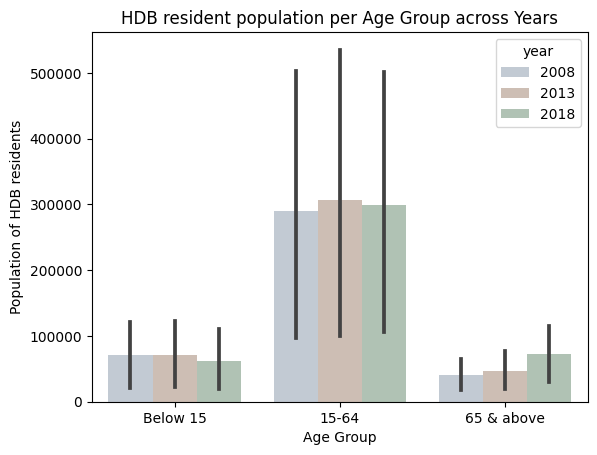

In [54]:
ax1=sns.barplot(data = hdb_resident_popln, x='age_group', y = 'value', hue = 'year',palette='pastel',saturation =0.2)
ax1.set(xlabel='Age Group', ylabel='Population of HDB residents', title='HDB resident population per Age Group across Years')
plt.show(ax1)

Trending the data across the age group over the years reveal several interesting phenomenon: 
- The HDB resident population for aged <mark> 15 and above </mark> has increased steadily over the years, with a stark jump noted between 2013 and 2018 for the group aged <mark> 65 and above</mark>. 
- The HDB resident population for the group <mark>below 15</mark> has decreased. 

This shows that the HDB resident population is greying. Citing reasons such as comfort and a sense of attachment to the flat, more and more elderly households may desire to continue living in their existing flat. 

From a social policy standpoint, the Government should consider expanding more assisted living options, which will integrate housing for seniors with care services. More elderly-friendly upgrades to existing HDB flats can help the elderly age in place too. 

Next, to compare the HDB resident population against the Singapore resident population across the same age groups, I created 3 clusters within the <mark>sg_resident</mark> dataset for aged <mark>below 15</mark>, from <mark>15 to 64</mark> and <mark>65 & above</mark>, and assigned the relevant headings to each cluster.

In [14]:
sg_resident_below15 = sg_resident.loc[(sg_resident['level_2'] == '0  -  4 Years')|(sg_resident['level_2'] == '5  -  9 Years')|(sg_resident['level_2'] == '10 - 14 Years'),['year','value']]
sg_resident_15to64 = sg_resident.loc[(sg_resident['level_2'] == '15 - 19 Years')|(sg_resident['level_2'] == '20 - 24 Years')|(sg_resident['level_2'] == '25 - 29 Years')|(sg_resident['level_2'] == '30 - 34 Years')|(sg_resident['level_2'] == '35 - 39 Years')|(sg_resident['level_2'] == '40 - 44 Years')|(sg_resident['level_2'] == '45 - 49 Years')|(sg_resident['level_2'] == '50 - 54 Years')|(sg_resident['level_2'] == '55 - 59 Years')|(sg_resident['level_2'] == '60 - 64 Years'),['year','value']]
sg_resident_above65=sg_resident.loc[(sg_resident['level_2'] == '65 Years & Over'),['year','value']]

sg_resident_below15 = sg_resident_below15.groupby ('year').sum().reset_index()
sg_resident_15to64 = sg_resident_15to64.groupby ('year').sum().reset_index()
sg_resident_above65 = sg_resident_above65.groupby ('year').sum().reset_index()

sg_resident_below15

,year,value
0,2008,671307
1,2013,615243
2,2018,591124


In [15]:
sg_resident_below15 ['age_group']= 'Below 15'
sg_resident_15to64 ['age_group']= '15-64'
sg_resident_above65 ['age_group'] = '65 & above'

sg_resident_popln = pd.concat([sg_resident_below15,sg_resident_15to64,sg_resident_above65]).reset_index(drop=True)
sg_resident_popln

,year,value,age_group
0,2008,671307,Below 15
1,2013,615243,Below 15
2,2018,591124,Below 15
3,2008,2655562,15-64
4,2013,2825071,15-64
5,2018,2855305,15-64
6,2008,315790,65 & above
7,2013,404437,65 & above
8,2018,547854,65 & above


[Text(0, 0.5, 'Population of SG residents')]

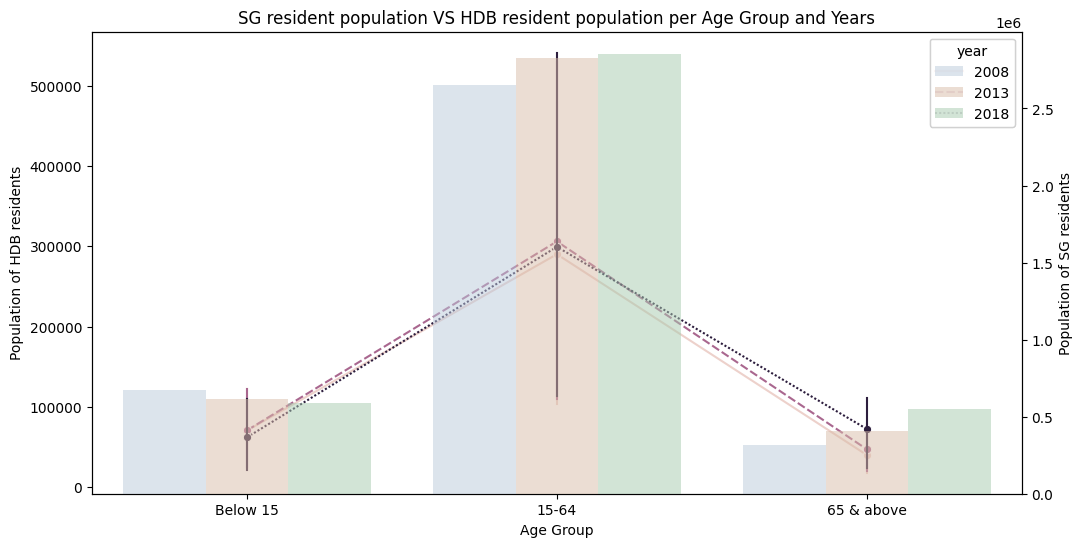

In [43]:
matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )
fig, ax1 = plt.subplots(figsize=(12,6))
sns.lineplot(data = hdb_resident_popln, x ='age_group', y='value', marker='o', sort = False, ax=ax1, hue = 'year',style = 'year', err_style="bars") 
ax1.set(xlabel='Age Group', ylabel='Population of HDB residents')

ax2 = ax1.twinx()
sns.barplot(data = sg_resident_popln, x='age_group', y='value',alpha=0.5, ax=ax2,hue = 'year',palette='pastel',saturation =0.4).set (title='SG resident population VS HDB resident population per Age Group and Years')
ax2.set(ylabel='Population of SG residents')

Here, we noticed several interesting trends: 
- The proportion of HDB residents in the SG resident population that is aged <mark>  65 and above </mark> has increased over the years.
- The proportion of HDB residents in the SG resident population that is aged <mark> 15 to 64 </mark> has reduced between 2013 and 2018. 
There is no significant conclusive trend for those <mark> below 15 </mark>.

This confirmed that there is now a decrease in younger SG residents (aged <mark> 15 to 64</mark>) who stay in HDBs, which can indicate an ageing population or a switch in preference away from public flats to private housing. On the other hand, HDB flats seemed to be a popular option when it came to accommodation in the silver years. 

From a socio-economic standpoint, it is important for the Government to further examine the issue of the decrease in younger Singaporean HDB residents. This is because it may indicate other trends like increase in younger single/LGBT households (who therefore cannot qualify for HDBs) or an increase in affluence leading to higher demand in private housing. 

The Government may also consider rolling out more __[assisted living HDB flats](https://www.straitstimes.com/singapore/housing/singapores-first-assisted-living-hdb-flats-for-seniors-to-launch-in-bukit-batok-in)__ to cater for more demand for HDB flats from the silver population. Their existing flats can then be relaunched to cater for other types of demand (e.g. smaller flat types for single households). 

In conclusion, this is a simple exercise that uses pandas, matplotlib and seaborn packages on three datasets. A key limitation is in the short time period in which the data was collected by the Housing Development Board (only 3 years) and more can be done to obtain a more holistic view of the public housing situation in Singapore.